In [55]:
# importing necessary libraries.
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import numpy as np
import glob

In [56]:
batsman_t20 = pd.read_csv("C:\\Users\\SATWIK M BADIGER\\Desktop\\AIML\\Batting\\t20bat.csv")
batsman_t20.head(20)

,Player,Team,Span,Mat,Inns,NO,Bat_Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli,INDIA,201002019,75,70,20,2633,94*,52.66,1907,138.07,0,24,2,247,71
1,RG Sharma,INDIA,200702019,104,96,14,2633,118,32.10,1905,138.21,4,19,6,234,120
2,MJ Guptill,NEW ZEALAND,200902019,83,80,7,2436,105,33.36,1810,134.58,2,15,2,215,113
3,Shoaib Malik,PAKISTAN,200602019,111,104,30,2263,75,30.58,1824,124.06,0,7,1,186,61
4,BB McCullum,NEW ZEALAND,200502015,71,70,10,2140,123,35.66,1571,136.21,2,13,3,199,91
5,DA Warner,AUSTRALIA,200902019,76,76,8,2079,100*,30.57,1476,140.85,1,15,5,203,86
6,EJG Morgan,ENGLAND,200902019,86,84,17,2002,91,29.88,1475,135.72,0,11,3,151,96
7,Mohammad Shahzad,AFGHANISTAN,201002018,65,65,3,1936,118*,31.22,1436,134.81,1,12,3,218,72
8,JP Duminy,SOUTH AFRICA,200702019,81,75,25,1934,96*,38.68,1532,126.24,0,11,6,138,71
9,PR Stirling,IRELAND,200902019,72,71,6,1929,91,29.67,1401,137.68,0,16,8,233,59


In [57]:
features = ['Player','Ave','SR','Bat_Runs', 'NO','Team'] # features considered.
batsman_t20 = batsman_t20.dropna(subset=features) # remove rows not dont have numerical value from the features.
batsman_t20 = batsman_t20[features].copy()
batsman_t20

,Player,Ave,SR,Bat_Runs,NO,Team
0,V Kohli,52.66,138.07,2633,20,INDIA
1,RG Sharma,32.10,138.21,2633,14,INDIA
2,MJ Guptill,33.36,134.58,2436,7,NEW ZEALAND
3,Shoaib Malik,30.58,124.06,2263,30,PAKISTAN
4,BB McCullum,35.66,136.21,2140,10,NEW ZEALAND
...,...,...,...,...,...,...
2001,SG Whittingham,0.00,0.00,0,0,SCOTLAND
2002,LJ Woodcock,0.00,0.00,0,0,NEW ZEALAND
2003,Zamir Khan,0.00,0.00,0,0,AFGHANISTAN
2004,S Zargar,0.00,0.00,0,0,MEXICO


In [58]:
batsman_t20 = batsman_t20.dropna() # removing incorrect data
batsman_t20

,Player,Ave,SR,Bat_Runs,NO,Team
0,V Kohli,52.66,138.07,2633,20,INDIA
1,RG Sharma,32.10,138.21,2633,14,INDIA
2,MJ Guptill,33.36,134.58,2436,7,NEW ZEALAND
3,Shoaib Malik,30.58,124.06,2263,30,PAKISTAN
4,BB McCullum,35.66,136.21,2140,10,NEW ZEALAND
...,...,...,...,...,...,...
2001,SG Whittingham,0.00,0.00,0,0,SCOTLAND
2002,LJ Woodcock,0.00,0.00,0,0,NEW ZEALAND
2003,Zamir Khan,0.00,0.00,0,0,AFGHANISTAN
2004,S Zargar,0.00,0.00,0,0,MEXICO


In [59]:
# scaling the data.
scaler = StandardScaler()
features = ['Ave','SR','Bat_Runs', 'NO']
scaled_data = pd.DataFrame( scaler.fit_transform(batsman_t20[features]) , columns = features )
df = PCA(2).fit_transform(scaled_data)
scaled_data

,Ave,SR,Bat_Runs,NO
0,3.077064,1.015518,8.370946,6.121781
1,1.482925,1.018386,8.370946,4.105223
2,1.580620,0.944036,7.710562,1.752571
3,1.365070,0.728565,7.130631,9.482712
4,1.758953,0.977422,6.718310,2.760850
...,...,...,...,...
1962,-1.005978,-1.812432,-0.455404,-0.600081
1963,-1.005978,-1.812432,-0.455404,-0.600081
1964,-1.005978,-1.812432,-0.455404,-0.600081
1965,-1.005978,-1.812432,-0.455404,-0.600081


In [60]:
''' To find how many clusers are to be formed '''
def elbow_plot( min_k, max_k, k_max_iter):
    sum_squared_distances = []
    k_range = range(min_k,max_k+1)
    for k in k_range:
        km = KMeans(n_clusters=k, max_iter=k_max_iter, n_init=50)
        km.fit(df)
        sum_squared_distances.append(km.inertia_)
        
    # Plot the score for each value of k
    plt.plot(k_range, sum_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

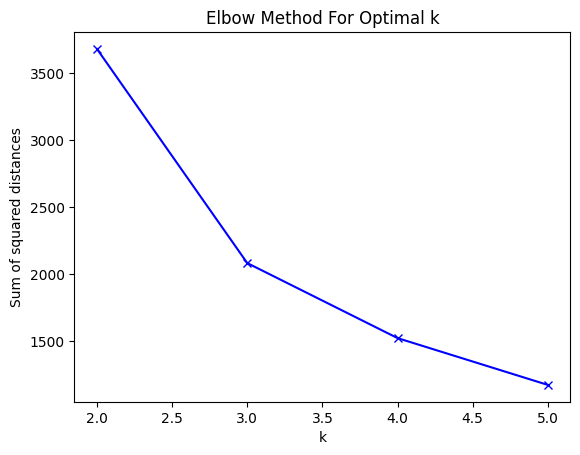

In [61]:
elbow_plot(2,5,50)

In [62]:
# Clustering the players using k-means algorithm
km = KMeans(n_clusters=3,n_init=50)
label = km.fit_predict(df)
scaled_data['Cluster'] = km.labels_ # assigning the cluster number for each datapoint in the dataframe.
scaled_data['Cluster'].value_counts()
label

array([1, 1, 1, ..., 0, 0, 0])

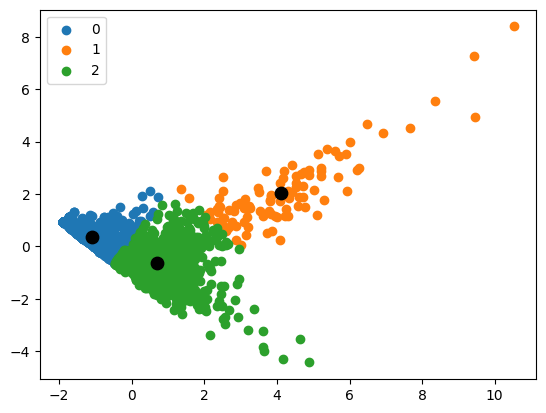

In [63]:
centroids = km.cluster_centers_
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label==i,0],df[label==i,1], label=i)
plt.scatter(centroids[:,0], centroids[:,1], s=80, color = 'k')
plt.legend()
plt.show()

In [64]:
scaled_data.insert(0,'Player',batsman_t20['Player']) # adding player name to the cluster...
scaled_data.insert(1,'Team',batsman_t20['Team'])
# scaled_data

In [65]:
# spliting the dataframe into diffrent clusters.
b0 = scaled_data.loc[scaled_data['Cluster']==0]
b1 = scaled_data.loc[scaled_data['Cluster']==1]
b2 = scaled_data.loc[scaled_data['Cluster']==2]

In [66]:
len(b0),len(b1),len(b2)

(964, 102, 901)

In [67]:
b0

,Player,Team,Ave,SR,Bat_Runs,NO,Cluster
451,MA Ouma,KENYA,-0.459350,-0.186775,-0.029674,-0.263988,0
474,Imrul Kayes,BANGLADESH,-0.296525,0.006370,-0.056492,-0.600081,0
485,Shahzaib Hasan,PAKISTAN,-0.106562,0.015177,-0.066548,-0.600081,0
494,Fiaz Ahmed,BAHRAIN,0.079525,-0.162197,-0.079957,-0.600081,0
510,B Zuiderent,NETHERLANDS,-0.176344,0.060647,-0.096718,-0.263988,0
...,...,...,...,...,...,...,...
1962,S Qeshile,SOUTH AFRICA,-1.005978,-1.812432,-0.455404,-0.600081,0
1963,Raja Adeel,SPAIN,-1.005978,-1.812432,-0.455404,-0.600081,0
1964,Rashid Khan,NEPAL,-1.005978,-1.812432,-0.455404,-0.600081,0
1965,KA Reynolds,BELIZE,-1.005978,-1.812432,-0.455404,-0.600081,0


In [68]:
b2

,Player,Team,Ave,SR,Bat_Runs,NO,Cluster
47,MDKJ Perera,SRI LANKA,1.155723,0.953867,3.470026,-0.600081,2
63,GC Smith,SOUTH AFRICA,1.449584,0.799638,2.836459,0.072105,2
66,G Gambhir,INDIA,1.119281,0.625336,2.668849,0.072105,2
69,MP O'Dowd,NETHERLANDS,1.028564,0.657902,2.447604,0.072105,2
71,E Lewis,WEST INDIES,1.386005,1.323772,2.336981,-0.263988,2
...,...,...,...,...,...,...,...
1555,PR Brown,ENGLAND,-1.005978,6.380369,-0.441995,-0.263988,2
1557,YS Chahal,INDIA,-1.005978,2.283968,-0.441995,-0.263988,2
1590,T Ulutuna,TURKEY,-1.005978,1.259868,-0.445347,-0.263988,2
1619,KAJ Roach,WEST INDIES,-1.005978,2.283968,-0.448699,-0.263988,2


In [69]:
b1

,Player,Team,Ave,SR,Bat_Runs,NO,Cluster
0,V Kohli,INDIA,3.077064,1.015518,8.370946,6.121781,1
1,RG Sharma,INDIA,1.482925,1.018386,8.370946,4.105223,1
2,MJ Guptill,NEW ZEALAND,1.580620,0.944036,7.710562,1.752571,1
3,Shoaib Malik,PAKISTAN,1.365070,0.728565,7.130631,9.482712,1
4,BB McCullum,NEW ZEALAND,1.758953,0.977422,6.718310,2.760850,1
...,...,...,...,...,...,...,...
308,TG Southee,NEW ZEALAND,-0.058489,1.191459,0.282081,3.433036,1
312,CJ Jordan,ENGLAND,0.189626,0.852686,0.268672,3.096943,1
446,SL Malinga,SRI LANKA,-0.454698,-0.098907,-0.026322,3.433036,1
578,Raees Ahmadzai,AFGHANISTAN,-0.364756,0.354769,-0.150353,3.433036,1


In [70]:
print(scaled_data['Cluster'].value_counts())

Cluster
0    964
2    901
1    102
Name: count, dtype: int64


In [86]:
import pandas as pd

def cluster_data(data, column_name):
    clusters = {}
    unique_values = data[column_name].unique()

    for value in unique_values:
        clusters[value] = data[data[column_name] == value]

    # clusters = {key: group for key, group in data.groupby(column_name)}

    return clusters

# Example usage:

column_name = 'Team'
result = cluster_data(b1, column_name)

for key, cluster in result.items():
    print(f'Cluster for {key}:')
    print(cluster)
    print('\n')


Cluster for INDIA:
           Player   Team       Ave        SR  Bat_Runs         NO  Cluster
0         V Kohli  INDIA  3.077064  1.015518  8.370946   6.121781        1
1       RG Sharma  INDIA  1.482925  1.018386  8.370946   4.105223        1
19       MS Dhoni  INDIA  1.909373  0.770963  4.965108  13.515829        1
22       SK Raina  INDIA  1.256520  0.949976  4.924882   3.096943        1
27       S Dhawan  INDIA  1.153397  0.813566  4.586309   0.408198        1
45   Yuvraj Singh  INDIA  1.166578  0.980904  3.490139   2.424757        1
51       KL Rahul  INDIA  2.386994  1.187362  3.359403   1.080385        1
108     MK Pandey  INDIA  2.028003  0.702758  1.512339   3.433036        1
174    KD Karthik  INDIA  1.572091  1.127145  0.882125   4.105223        1


Cluster for NEW ZEALAND:
            Player         Team       Ave        SR  Bat_Runs        NO  \
2       MJ Guptill  NEW ZEALAND  1.580620  0.944036  7.710562  1.752571   
4      BB McCullum  NEW ZEALAND  1.758953  0.977422  6